In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [292]:
dataset = pd.read_csv('data/AirQualityUCI.csv', sep=';', decimal=',')

In [293]:
dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [294]:
dataset.columns.values

array(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15',
       'Unnamed: 16'], dtype=object)

In [295]:
dataset = dataset.drop(['Unnamed: 15', 'Unnamed: 16'], 1)

In [296]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [297]:
dataset.dropna(axis=0, how= 'all', inplace=True)

In [298]:
dataset.replace(to_replace=-200, value=np.nan, inplace = True)

In [299]:
dataset.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [300]:
# Let's Drop NMHC(GT)
dataset = dataset.drop('NMHC(GT)', 1)

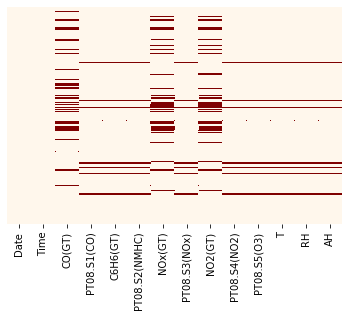

In [301]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='OrRd')

In [302]:
dataset[['CO(GT)','C6H6(GT)','T','RH','AH']] = dataset[['CO(GT)','C6H6(GT)','T','RH','AH']].apply(pd.to_numeric)

In [303]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


In [304]:
dataset['DateTime'] = dataset['Date'] + ' ' + dataset['Time']
dataset.drop('Time', 1)
dataset['DateTime']

0       10/03/2004 18.00.00
1       10/03/2004 19.00.00
2       10/03/2004 20.00.00
3       10/03/2004 21.00.00
4       10/03/2004 22.00.00
               ...         
9352    04/04/2005 10.00.00
9353    04/04/2005 11.00.00
9354    04/04/2005 12.00.00
9355    04/04/2005 13.00.00
9356    04/04/2005 14.00.00
Name: DateTime, Length: 9357, dtype: object

In [305]:
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'].astype(str), format='%d/%m/%Y %H.%M.%S')

In [306]:
dataset['DateTime']

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: DateTime, Length: 9357, dtype: datetime64[ns]

In [307]:
dataset['Year'] = dataset['DateTime'].map(lambda x: x.year)

In [308]:
dataset["T"] = dataset.groupby("Date")["T"].transform(lambda x: x.fillna(x.mean()))
dataset["CO(GT)"] = dataset.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
dataset["NOx(GT)"] = dataset.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
dataset["NO2(GT)"] = dataset.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

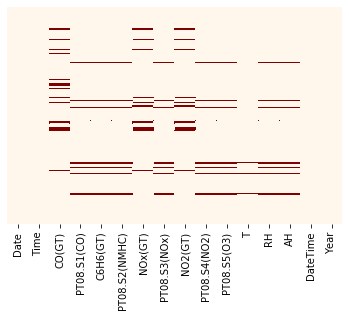

In [309]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='OrRd')

In [310]:
dataset.fillna(method='ffill', inplace = True)

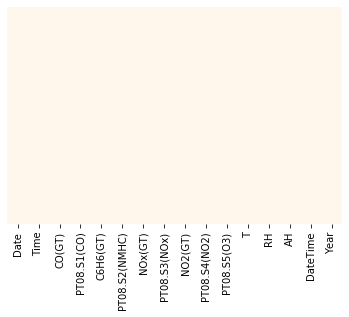

In [311]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='OrRd')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000241F5C2FE08>,
      dtype=object)

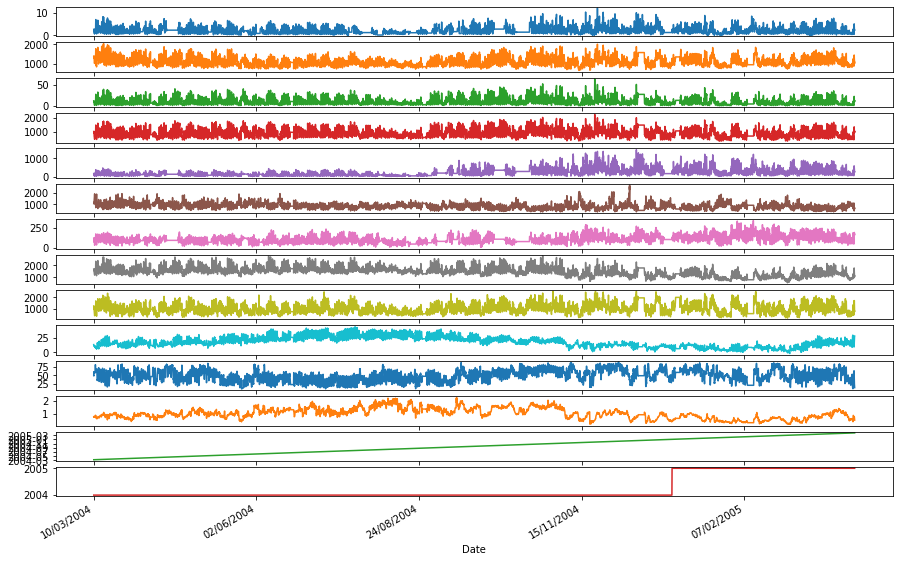

In [312]:
dataset.plot(x='Date',subplots=True, figsize=(15, 10),legend=False)

In [313]:
corr = dataset.corr()

In [314]:
corr

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year
CO(GT),1.000000,0.781841,0.803253,0.788371,0.758892,-0.616421,0.641499,0.529622,0.761814,-0.028404,0.059654,0.007591,-0.025597
PT08.S1(CO),0.781841,1.000000,0.886325,0.896015,0.651010,-0.777913,0.569623,0.676413,0.901460,0.027467,0.120042,0.121724,0.016204
C6H6(GT),0.803253,0.886325,1.000000,0.982485,0.641097,-0.737702,0.525939,0.756328,0.861688,0.180001,-0.054949,0.155825,-0.143514
PT08.S2(NMHC),0.788371,0.896015,0.982485,1.000000,0.625352,-0.798121,0.548668,0.769786,0.876588,0.221644,-0.082087,0.174921,-0.154727
NOx(GT),0.758892,0.651010,0.641097,0.625352,1.000000,-0.598576,0.756066,0.186632,0.722046,-0.287481,0.209849,-0.156331,0.223926
PT08.S3(NOx),-0.616421,-0.777913,-0.737702,-0.798121,-0.598576,1.000000,-0.562983,-0.535264,-0.795958,-0.124768,-0.060581,-0.216738,-0.140800
NO2(GT),0.641499,0.569623,0.525939,0.548668,0.756066,-0.562983,1.000000,0.087560,0.629989,-0.239713,-0.080338,-0.365643,0.402556
PT08.S4(NO2),0.529622,0.676413,0.756328,0.769786,0.186632,-0.535264,0.087560,1.000000,0.579192,0.556908,-0.015158,0.630272,-0.514442
PT08.S5(O3),0.761814,0.901460,0.861688,0.876588,0.722046,-0.795958,0.629989,0.579192,1.000000,-0.052393,0.137821,0.055483,0.041717
T,-0.028404,0.027467,0.180001,0.221644,-0.287481,-0.124768,-0.239713,0.556908,-0.052393,1.000000,-0.554272,0.662174,-0.528371


Text(0.5, 1, 'Correlations')

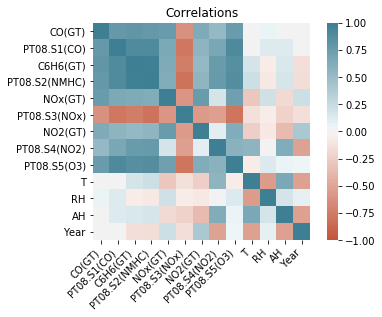

In [315]:
ax = sns.heatmap(corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220, n=200),
    square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)
plt.title('Correlations')

In [316]:
corr['CO(GT)'].sort_values(ascending=False)

CO(GT)           1.000000
C6H6(GT)         0.803253
PT08.S2(NMHC)    0.788371
PT08.S1(CO)      0.781841
PT08.S5(O3)      0.761814
NOx(GT)          0.758892
NO2(GT)          0.641499
PT08.S4(NO2)     0.529622
RH               0.059654
AH               0.007591
Year            -0.025597
T               -0.028404
PT08.S3(NOx)    -0.616421
Name: CO(GT), dtype: float64

In [317]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
 14  DateTime       9357 non-null   datetime64[ns]
 15  Year           9357 n

In [318]:
df = dataset.drop(['Date', 'Time', 'DateTime', 'Year'], 1, inplace = False)

In [319]:
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
class regression_hook:
    
    def __init__(self, x, y, x_, y_, dict_=False):
        
        self.x_test = x
        self.y_test = y
        self.x_train = x_
        self.y_train = y_
    
    def LN(self):
        model = LinearRegression().fit(self.x_train, self.y_train)
        train_score = model.score(self.x_train, self.y_train) * 100
        test_score = model.score(self.x_train, self.y_train) * 100
        print(f'Results For LinearR: Train {train_score} | Test {test_score}')
    
    def KNN(self):
        model = KNeighborsRegressor().fit(self.x_train, self.y_train)
        train_score = model.score(self.x_train, self.y_train) * 100
        test_score = model.score(self.x_train, self.y_train) * 100
        print(f'Results For KNeighborsRegressor: Train {train_score} | Test {test_score}')
    
    def SVR(self):
        model = SVR().fit(self.x_train, self.y_train)
        train_score = model.score(self.x_train, self.y_train) * 100
        test_score = model.score(self.x_train, self.y_train) * 100
        print(f'Results For SVR: Train {train_score} | Test {test_score}')
    
    def DCR(self):
        model = DecisionTreeRegressor().fit(self.x_train, self.y_train)
        train_score = model.score(self.x_train, self.y_train) * 100
        test_score = model.score(self.x_train, self.y_train) * 100
        print(f'Results For DecisionTreeRegressor: Train {train_score} | Test {test_score}')
    
    def FCR(self):
        model = RandomForestRegressor().fit(self.x_train, self.y_train)
        train_score = model.score(self.x_train, self.y_train) * 100
        test_score = model.score(self.x_train, self.y_train) * 100
        print(f'Results For RandomForestRegressor: Train {train_score} | Test {test_score}')
    
    def start(self):
        print("Starting Regression Hook!")
        self.LN()
        self.KNN()
        self.SVR()
        self.DCR()
        self.FCR()
        


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
data_x = df.drop('CO(GT)', 1)
data_y = df['CO(GT)']

In [ ]:
data_x.info()

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(data_x, data_y,)